<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Yosef, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project! 

Nevertheless, there are some comments/areas that will help you to make your project even better and should be fixed before this project can be accepted:
- Update hypothesis formulation.
 
Of course, it will be amazing if you have time to check also yellow comments :)
I will wait for the new version of the project. Come back soon! 

And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Yosef, thank you for going an extra mile and making changes in your project.
Your project has been accepted. Wish you cool projects in the next sprints.
    

# Project description
I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
It would be great to add additional information about the project goal and tasks. It gives an overview of what you are going to achieve in this project. Also, this introduction potentially can be used as a Readme file in your portfolio on Github. One example of a nice introduction for a data analysis project can be found here: [https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md](https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md)

# Loading the data

In [1]:
import pandas as pd

In [2]:
game_data = pd.read_csv('/datasets/games.csv')
game_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


I'll check the columns data type

In [3]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


There's alot zero values they indicate about missing values.

# Dealing with the column
First I'll change the column to lower case

In [5]:
columns_lower = []
for column in game_data.columns:
    columns_lower.append(column.lower())
game_data.columns = columns_lower
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

# Dealing with the missing and duplicated values
Let's have a look at the missing values

In [6]:
game_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
len(game_data.isna().sum())/len(game_data)

0.0006580915345498055

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It is also sometimes helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:

    games.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)
</div>

In [8]:
game_data['rating'].fillna(value='no rating', inplace=True)

I think user's who played the game have not left rating on the particular game,
maybe the game wasnt so good.

In [9]:
print('what part of the data is the missing values at "critic score" column: {:%}'.format(game_data['critic_score'].isna().sum()/len(game_data)))

what part of the data is the missing values at "critic score" column: 51.319174%


It seems that half of the data is missing at this column,
it's strange.
Maybe it's not a human mistake it could be somthing wrong with the calculation of the data made by the computer.

In [10]:
game_data.query('critic_score != "NaN"')['critic_score'].mean()

68.96767850559173

In [11]:
game_data.query('critic_score != "NaN"')['critic_score'].median()

71.0

Now I'm going to check if there is a outliers or not in order to fill the missing values.

In [12]:
print('This is the minimum value: {:}'.format(min(game_data.query('critic_score != "NaN"')['critic_score'])))

This is the minimum value: 13.0


In [13]:
print('This is the maximum value: {:}'.format(max(game_data.query('critic_score != "NaN"')['critic_score'])))

This is the maximum value: 98.0


There is no outliers therfore I'll use the mean to fill the missing values.

In [14]:
game_data['critic_score'].fillna(value=game_data.query('critic_score != "NaN"')['critic_score'].mean(), inplace=True)

Lets run the same check for the 'user_score' column

In [15]:
game_data['user_score'].isna().sum()/len(game_data)

0.4008973975471134

40% of the users score is missing values. That big chunk of the data I will delete it because it could harm my investigation.
Therfore I'll delete the missing values with zeros because if the user dont left a rate to the game it probably means the game wasnt good enough the leave a feedback.

In [16]:
print('The part of the whole data is: {:%}'.format(len(game_data[game_data['year_of_release'] == 'Unknown'])/len(game_data)))

The part of the whole data is: 0.000000%


I have no need for this data and even more, It can harm my investigation. Also it a small part of the data so I'll delete it.

In [17]:
game_data.dropna(inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed here we have a very small proportion of missing data (<2%) it can be just deleted.

Lets check if there are missing value.

In [18]:
game_data['user_score'].isna().sum()

0

In [19]:
game_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Seem's to be ok!


Good!

In [20]:
game_data.duplicated().sum()

0

Alright!! no duplicates.

I'll eliminate the unwanted rows

In [21]:
game_data.loc[game_data['user_score'] == "tbd" , 'user_score'] = float('NaN')

In [22]:
game_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2376
rating                0
dtype: int64

In [23]:
game_data.dropna(inplace=True)

In [24]:
game_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

# Calculating total sales

In [25]:
game_data['total_sales'] = game_data['eu_sales'] + game_data['na_sales'] + game_data['jp_sales'] + game_data['other_sales']

In [26]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,68.967679,8.1,K-A,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.000000,7.6,M,0.01
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.000000,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.000000,7.2,E10+,0.01


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here. 

Btw it is possible to get the same result using this code: 
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
    
</div>

# Analayzing the data

In [27]:
game_data['year_of_release'].astype(float).sort_values().unique()

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

In [28]:
century = []
for year in game_data['year_of_release']:
    if 1980 <= year < 1990:
        century.append('18th')
    elif 1990 <= year < 2000:
        century.append('19th')
    elif 2000 <= year < 2010:
        century.append('20th')
    elif 2010 <= year < 2020:
        century.append('21th')
    else:
        century.append(float('NaN'))
game_data['decade'] = century

In [29]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,82.54,20th
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52,20th
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,32.77,20th
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.5,E,29.80,20th
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.6,E,28.91,20th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,68.967679,8.1,K-A,0.01,19th
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.000000,7.6,M,0.01,21th
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.000000,5.8,T,0.01,21th
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.000000,7.2,E10+,0.01,21th


In [30]:
game_data.groupby('decade')['name'].count()

decade
18th       2
19th      90
20th    4872
21th    2499
Name: name, dtype: int64

The highest number of game released was between 2000-2010, and the lowest amount of games released was between 1980-1990

In [31]:
game_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     983.01
X360    888.89
PS3     829.17
Wii     696.02
DS      413.30
PS4     244.92
PS      214.45
XB      212.95
PC      202.92
PSP     195.61
GC      160.19
GBA     137.82
XOne    134.26
3DS     126.73
WiiU     67.21
PSV      34.27
DC        4.55
Name: total_sales, dtype: float64

PS2 has to most total sales, how does it look's on histogram.

year_of_release
2000.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2001.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2002.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2003.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2004.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2005.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2006.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2007.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2008.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2009.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2010.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2011.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

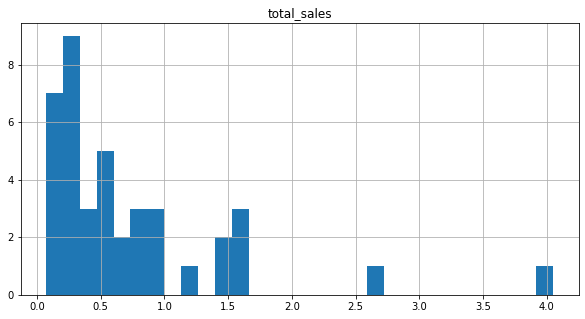

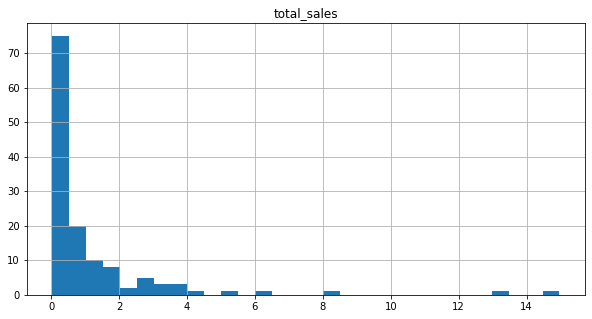

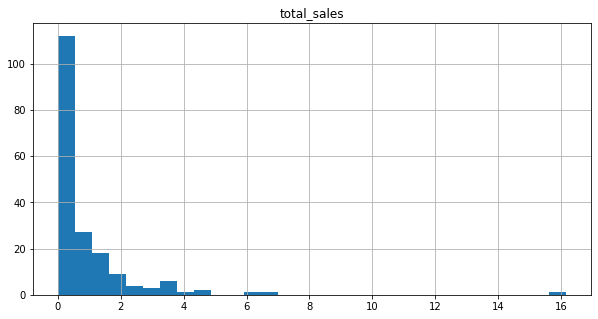

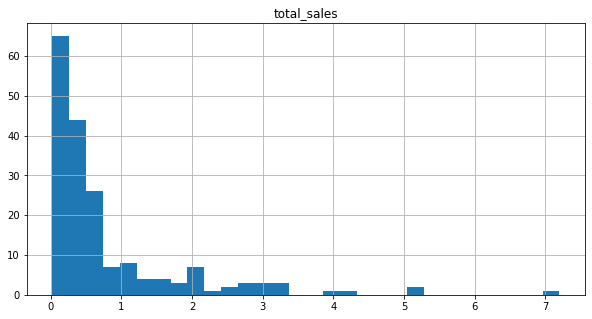

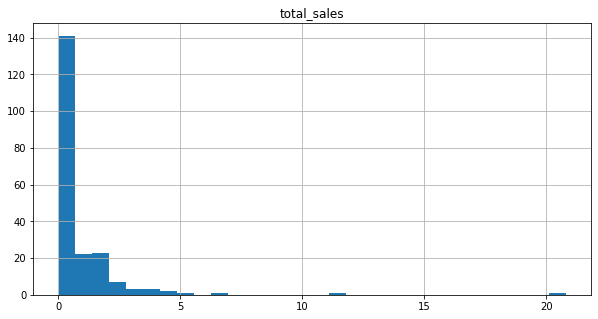

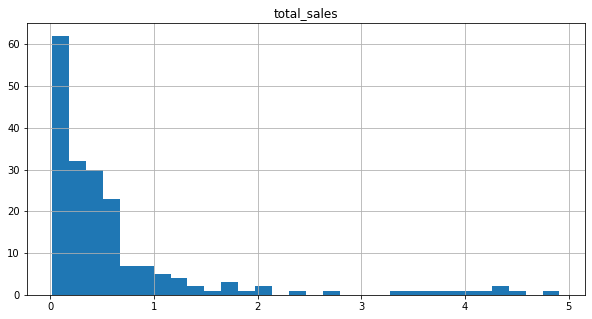

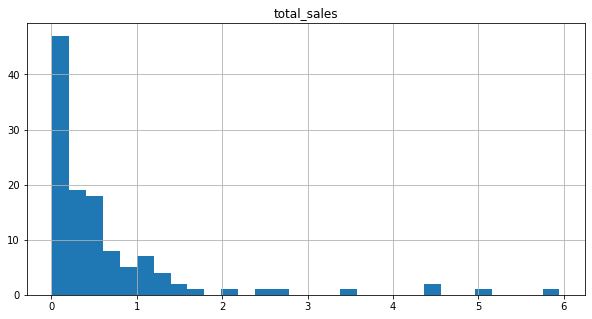

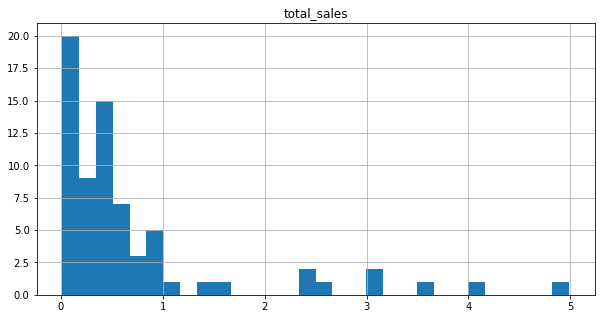

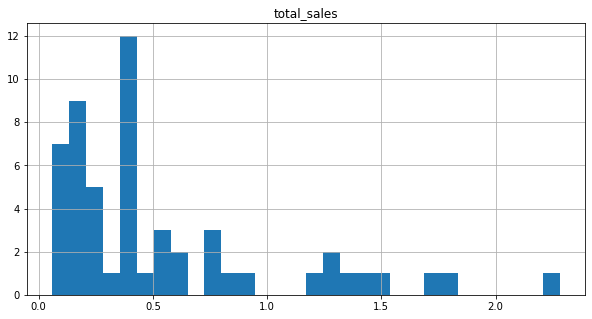

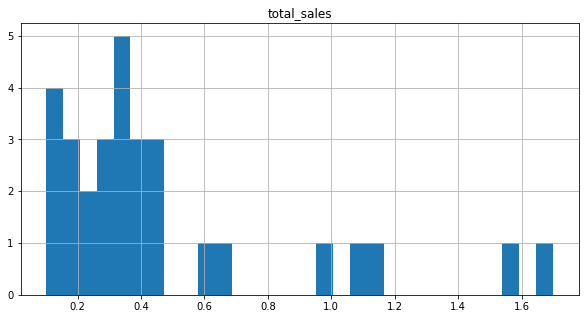

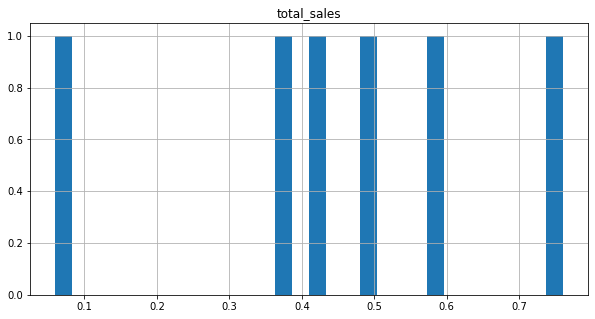

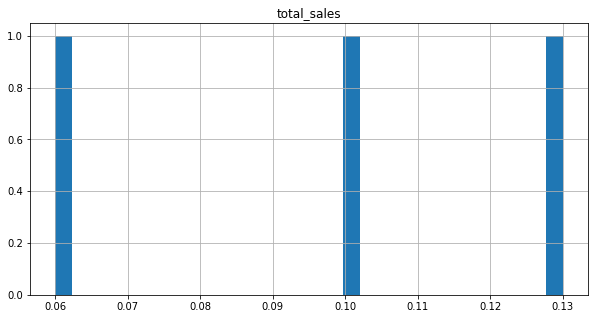

In [32]:
game_data.query('platform == "PS2"').groupby('year_of_release').hist('total_sales', bins=30, figsize=(10,5))

In [33]:
game_data.query('platform == "PS2"').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M,20.81,20th
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,20th
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,20th
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10,20th
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65,20th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,Graffiti Kingdom,PS2,2004.0,Role-Playing,0.01,0.01,0.00,0.00,71.0,7.1,E,0.02,20th
14531,S.L.A.I.: Steel Lancer Arena International,PS2,2005.0,Simulation,0.01,0.01,0.00,0.00,66.0,7.8,T,0.02,20th
16287,Metal Slug Anthology,PS2,2007.0,Shooter,0.00,0.00,0.01,0.00,80.0,8.1,T,0.01,20th
16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006.0,Shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+,0.01,20th


The ps2 platforme was one of the most popular platfrom by the years of 2004-2008 but then the popularity of this platform disapeared in fin air

# How much time it take before every platfrom become old and a new one replace it

In [34]:
game_data.query('decade == "18th"').sort_values(by='year_of_release', ascending=True)['platform'].value_counts()

PC    2
Name: platform, dtype: int64

In [35]:
game_data.query('decade == "19th"').sort_values(by='year_of_release', ascending=True)['platform'].value_counts()

PS    68
PC    19
DC     3
Name: platform, dtype: int64

In [36]:
game_data.query('decade == "20th"').sort_values(by='year_of_release', ascending=True)['platform'].value_counts()

PS2     1211
XB       571
DS       464
X360     450
Wii      426
PC       360
PSP      358
GC       357
PS3      322
GBA      251
PS        91
DC        11
Name: platform, dtype: int64

In [37]:
game_data.query('decade == "21th"').sort_values(by='year_of_release', ascending=True)['platform'].value_counts()

PS3     539
X360    495
PC      374
PS4     257
XOne    182
3DS     171
PSV     142
Wii     122
WiiU    100
PSP      60
DS       48
PS2       9
Name: platform, dtype: int64

Every dacade bring with him a emerge of a new platfrom.
First it was the "2600", then it was the "PS", afterwords "PS2" and finally(acording to the data) "PS3"

# Working with a filtered data
I'm going to work with the data relate to the year 2017

In [38]:
games_relevent_data = game_data.query('decade == "21th"')

In [39]:
games_relevent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     511.61
X360    501.99
PS4     244.92
Wii     134.49
XOne    134.26
3DS     126.73
PC      111.74
WiiU     67.21
PSV      34.27
DS       31.80
PSP      21.72
PS2       2.99
Name: total_sales, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you used only recent sales data and platform; however, I would suggest keeping data after 2014.
    
<div class='alert alert-warning'>
    <b>Student comment:</b>
 I didnt really understand why.

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>

Based on the platform cycle we can see that the latest generation (in data) starts from 2014/2013, so we can get full and relevant data.

PS3 seem to be leading in sales between the years 2010-2020.
Acording to the data pattern "PS3" should be drop it popularity to zero at the end of that decade, and then a new platform should come out instead of it.

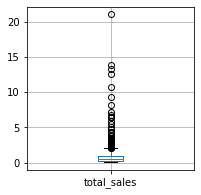

In [40]:
games_relevent_data.query('platform == "PS3"').boxplot('total_sales', figsize=(3,3));

We can see here that for the PS3 console there is some outliers but not much.

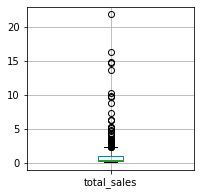

In [41]:
games_relevent_data.query('platform == "X360"').boxplot('total_sales', figsize=(3,3));

Same as here!

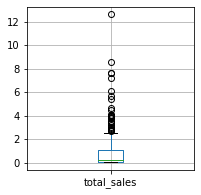

In [42]:
games_relevent_data.query('platform == "PS4"').boxplot('total_sales', figsize=(3,3));

There is a bunch of them here.

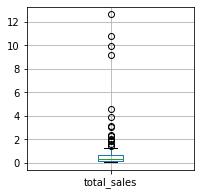

In [43]:
games_relevent_data.query('platform == "3DS"').boxplot('total_sales', figsize=(3,3));

The same!

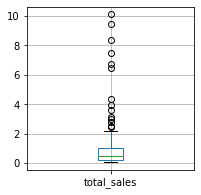

In [44]:
games_relevent_data.query('platform == "Wii"').boxplot('total_sales', figsize=(3,3));

There are few here.

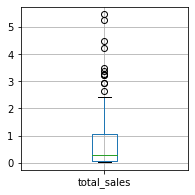

In [45]:
games_relevent_data.query('platform == "XOne"').boxplot('total_sales', figsize=(3,3));

There is less values at the top of the box plot which mean there is less outliers here.

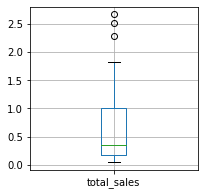

In [46]:
games_relevent_data.query('platform == "DS"').boxplot('total_sales', figsize=(3, 3));

That seems odd!
There is critic values that are outliers, and the rest of the values closer to the median.

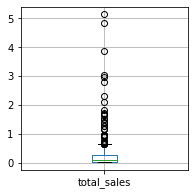

In [47]:
games_relevent_data.query('platform == "PC"').boxplot('total_sales', figsize=(3, 3));

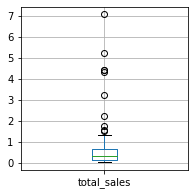

In [48]:
games_relevent_data.query('platform == "WiiU"').boxplot('total_sales', figsize=(3,3));

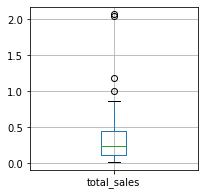

In [49]:
games_relevent_data.query('platform == "PSP"').boxplot('total_sales', figsize=(3,3));

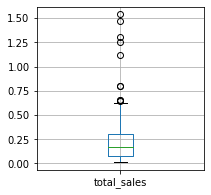

In [50]:
games_relevent_data.query('platform == "PSV"').boxplot('total_sales', figsize=(3,3));

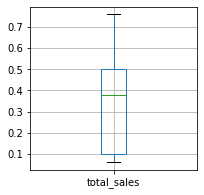

In [51]:
games_relevent_data.query('platform == "PS2"').boxplot('total_sales', figsize=(3,3));

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you created a boxplot with selected platforms to compare key statistics. 
Here you can also exclude outliers by specifing the “showfliers” parameter and seting it to false.

For the PC there are many critic outlieres, same as the WiiU.
The PSP as a few outliers same as the PSV.
But the PS2 values seem's alittle weird, most of the values are far from the median.

In [52]:
games_relevent_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
Wii     1.102377
X360    1.014121
PS4     0.952996
PS3     0.949184
3DS     0.741111
XOne    0.737692
WiiU    0.672100
DS      0.662500
PSP     0.362000
PS2     0.332222
PC      0.298770
PSV     0.241338
Name: total_sales, dtype: float64

In the years between 2010-2020 the "X360" as the highest sales average.

In [53]:
count = 0
for row in games_relevent_data['user_score']:
    if type(row) != str:
        count+= row
mean = count / len(games_relevent_data)
array = []
for index, row in games_relevent_data.iterrows():
    if type(row[9]) == str:
        array.append(mean)
    else:
        array.append(row[9])


In [54]:
games_relevent_data.query('user_score != "tbd"')['user_score'].astype(float).mean()

6.678311324529811

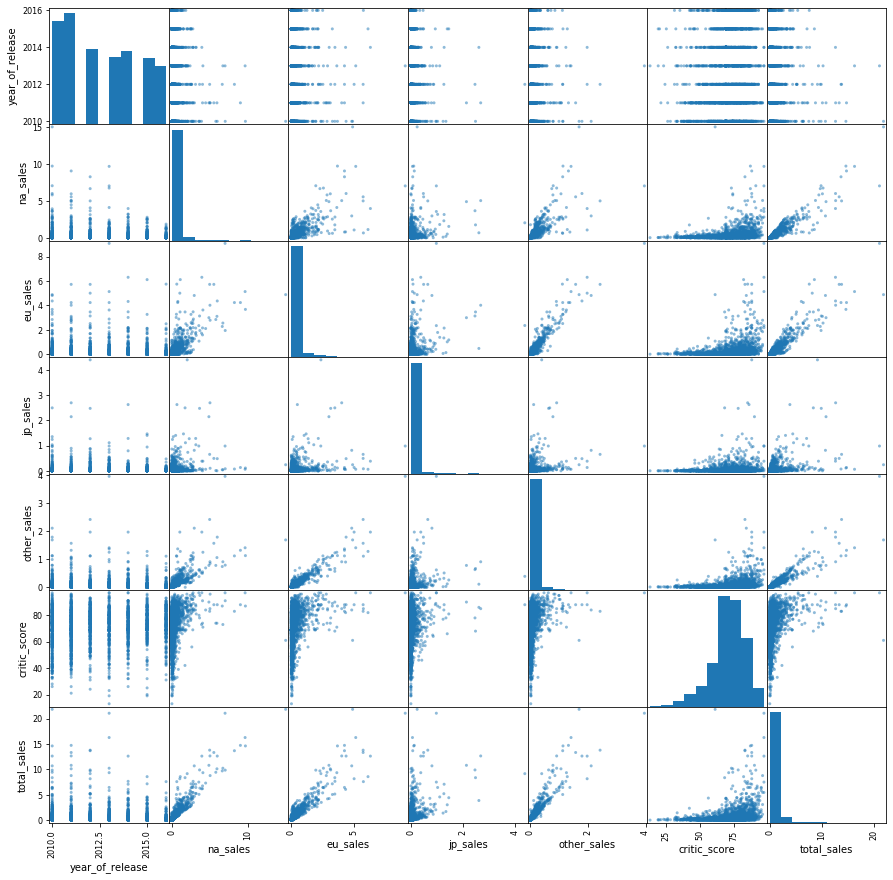

In [55]:
pd.plotting.scatter_matrix(games_relevent_data, figsize=(15,15));

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots but what conclusions can we make based on it?
    


In [56]:
games_relevent_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
year_of_release,1.000000,-0.112014,-0.040384,-0.042293,-0.059617,0.084851,-0.085917
na_sales,-0.112014,1.000000,0.741930,0.254355,0.768308,0.277882,0.928015
eu_sales,-0.040384,0.741930,1.000000,0.332259,0.942362,0.299414,0.925424
jp_sales,-0.042293,0.254355,0.332259,1.000000,0.283242,0.128821,0.416529
other_sales,-0.059617,0.768308,0.942362,0.283242,1.000000,0.296961,0.918164
critic_score,0.084851,0.277882,0.299414,0.128821,0.296961,1.000000,0.311270
total_sales,-0.085917,0.928015,0.925424,0.416529,0.918164,0.311270,1.000000


The table shows that the user rating had a no inffulence on the total sales, while the professional rating give a good positive feeback which made the total sales bette.

In [57]:
games = games_relevent_data.query('platform == "X360"')['name']

In [58]:
result  = []
for game in games:
    if games_relevent_data.query('platform == "PS4"')['name'].any() == game:
        result.append(game)
result

[]

The only game from the X360 console that was  sold was on the PS4 console is "Black Ops 3".
(I guess those microsoft employ had a few good idea's for a better experience exclusive games and sony doesnt ready for the challange maybe It's time to say bye bye to my old PS4 =).

In [59]:
games_relevent_data.groupby('genre').sum().sort_values(by='total_sales', ascending=False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
genre,,,,,,,
Action,1567941.0,243.50,200.29,33.74,65.69,54177.638565,543.22
Shooter,650061.0,213.30,152.35,12.41,50.17,23249.094998,428.23
Sports,633997.0,130.37,95.21,6.15,32.74,22534.640531,264.47
Role-Playing,533349.0,77.75,51.27,31.82,17.53,19316.612142,178.37
Misc,287720.0,78.28,40.38,8.97,12.27,9954.418213,139.90
Platform,211323.0,46.49,32.83,13.70,9.17,7783.644464,102.19
Racing,293823.0,35.39,43.84,6.27,11.89,10381.676785,97.39
Fighting,263604.0,30.16,16.61,6.54,6.82,9168.676785,60.13
Simulation,171038.0,14.44,18.39,7.92,3.79,5595.579821,44.54


The most profitable game genre is "Action" and less profitable genre is "Puzzle".
We can't generalize about this genres because those values correct for the years 2010-2020, but what if kids in the eighty or ninety doesnt look up for thise kind's of games this generation is different and kids this days are not the same as they use to be back then.

In [60]:
games_relevent_data.groupby(['name', 'genre']).sum().sort_values(by='total_sales', ascending=False)

,,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
name,genre,,,,,,,
Grand Theft Auto V,Action,10069.0,23.84,23.42,1.42,7.90,484.000000,56.58
Call of Duty: Modern Warfare 3,Shooter,8044.0,15.54,11.15,0.62,3.29,324.000000,30.60
Call of Duty: Black Ops II,Shooter,8048.0,14.08,10.84,0.72,3.76,321.000000,29.40
Call of Duty: Black Ops,Shooter,8040.0,16.99,8.54,0.59,3.08,329.000000,29.20
Call of Duty: Ghosts,Shooter,10065.0,14.71,8.48,0.48,3.03,369.000000,26.70
...,...,...,...,...,...,...,...,...
Super Stardust Ultra VR,Shooter,2016.0,0.00,0.01,0.00,0.00,66.000000,0.01
War for the Overworld,Strategy,2015.0,0.00,0.01,0.00,0.00,65.000000,0.01
Dokuro,Action,2012.0,0.00,0.00,0.01,0.00,76.000000,0.01


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

Indeed here we have popular genre - action but if we calculate revenue per published game that could be not the case. 
<div class="alert alert-warning">
<b>Student comment v1:</b>
Seem's to me I'm having the same result.

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>

To calculate revenue per published game a mean() method is required. Like this: 
    
    games_relevent_data[['genre','total_sales']].groupby('genre').mean().plot(kind='bar')

# Creating user profile

In [62]:
user_1 = games_relevent_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
user_1.sort_values(by='na_sales', ascending=False)

,na_sales
platform,
X360,306.80
PS3,206.40
PS4,84.66
XOne,78.61
Wii,69.89
3DS,50.06
PC,36.30
WiiU,31.19
DS,16.11


The top 5 platform best sallers in North-America are X360, PS3, Wii, PS4 and the XOne.

In [63]:
user_2 = games_relevent_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
user_2.sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS3,187.90
X360,147.99
PS4,112.78
PC,62.39
XOne,43.34
Wii,43.21
3DS,34.82
WiiU,20.96
PSV,10.22


The top 5 best sallers in Europe is the PS3, X360, PS4, PC, and the Wii.

In [64]:
user_3 = games_relevent_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
user_3.sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
PS3,41.64
3DS,33.96
WiiU,10.17
Wii,10.06
PS4,9.45
PSV,8.52
DS,6.46
PSP,6.43
X360,4.09


The top 5 best sallers in jappane is the 3DS, PS3, PSP, DS, and the PSV.

The differnces derive from the fact that every land has it native who has theire own culture and habits therfore the games that every console provid are not fit to every one as one group but for some of the sub-group. like for example North America and Europe are allmost the same platform because they are both influenced by the western culture but on the other hand jappan which is from the east are using totally diffrent platform.

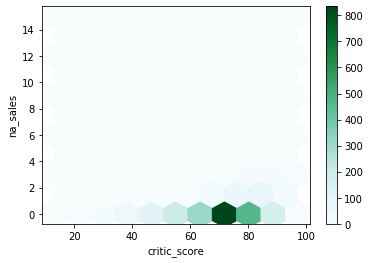

In [65]:
games_relevent_data.plot(x='critic_score', y='na_sales', kind='hexbin', gridsize=10, sharex=False);

In North-America seems that the rating doesnt has affect upon the sales.

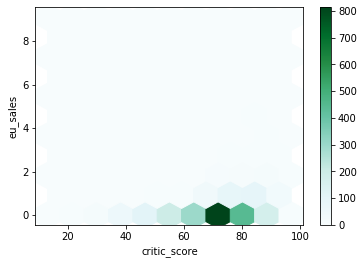

In [66]:
games_relevent_data.plot(x='critic_score', y='eu_sales', kind='hexbin', gridsize=10, sharex=False);

In Europe seems that the rating doesnt has affect upon the sales.

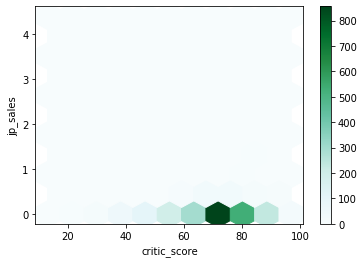

In [67]:
games_relevent_data.plot(x='critic_score', y='jp_sales', kind='hexbin', gridsize=10, sharex=False);

In jappane seems that the rating allmost doesnt has affect upon the sales.

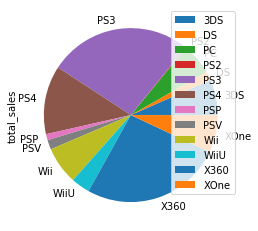

In [68]:
games_relevent_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='pie', y='total_sales');

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great! Everything is correct here.
Here we can also use groupped pie charts with subplots. It provides a nice overview of all data. 
    
One small comment regarding market shares by rating. It could be also helpful to understand proportion of unrated games per region, as this is quite an interesting information, especially for JP region.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Thanks for extending that.

# Testing the hypotheses

# First hypothesis
Ho - Avarage user rating of the Xbox One and PC platforms are the same.

In [69]:
xbox_one = games_relevent_data.query('platform == "XOne"  and user_score != "tbd"')['user_score'].astype(float)

In [70]:
pc = games_relevent_data.query('platform == "PC" and user_score != "tbd"')['user_score'].astype(float)

In [71]:
len(xbox_one)

182

In [72]:
xbox_one.mean()

6.521428571428572

In [73]:
pc.mean()

6.5181818181818185

In [74]:
len(pc)

374

I will add values to the xbox one some additional rows while keeping the avaragae and median in place.

In [75]:
xbox = []
p_c = []
for x in xbox_one:
    xbox.append(x)
for y in pc:
    p_c.append(y)

In [76]:
for i in range(0,97):
    xbox.append(6.521428571428572+4)
for i in range(0,95):
    xbox.append(6.521428571428572-4)

In [77]:
print(len(p_c))
p_c = pd.Series(p_c)
p_c.mean()

374


6.5181818181818185

In [78]:
print(len(xbox))
xbox = pd.Series(xbox)
xbox.mean()

374


6.542818945760123

Now i got both of the dataset(samples) and I can use them in order to find the pvalue desired.

In [79]:
from scipy import stats as st

In [80]:
result = st.ttest_rel(xbox, p_c)

In [81]:
alpha = 0.01

if result.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


The Ho can't be rejected thus we can asume that the avarage of user rating is the same for for PC and Xbox one platform

I choose a alpha to be equal to 1 percent because the groups are small and it can be more acurate.

# Second hypothesis
Ho - Average user ratings for the Action and Sports genres are the same

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, there is an issue in formulating null and alternative hypotheses.
A null hypothesis is a type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population. An alternative hypothesis always contradicts the null one.
Can you please update that and also formulate alternative.

In [82]:
action = games_relevent_data.query('genre == "Action"')['user_score'].astype(float)

In [83]:
sports = games_relevent_data.query('genre == "Sports"')['user_score'].astype(float)

In [84]:
print(len(action))


779


In [85]:
print(len(sports))


315


I'll equalize the number of lines for the proper data while keeping the avarage and median

In [86]:
sport = []
for x in sports:
    sport.append(x)

In [87]:
for r in range(0,232):
    sport.append(5.901587301587302 + 5)
for r in range(0,232):
    sport.append(5.901587301587302 - 5)

In [88]:
results = st.ttest_rel(sport, action)

In [89]:
alpha = 0.01

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


I reject the Ho then I can assume that:
average user ratings for the Action and Sports genres are not the same.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Null hypotheses have been formulated and tested correctly. One remark is still to formulate an alternative hypothesis:
    
    H0:
    H1:

Additionally, you can compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use in the st.ttest_ind (by default, True). Here you can manually calculate the variances, or use the Levene test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html or the Bartlett’s test (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bartlett.html)    


# Conclusion

In this project I insvestigated and identify patterns that determine whether a game succeeds or not. That allow ma to spot potential big winners and plan advertising campaigns.
I used the following steps:
1) Loading the data.

2) Used the describe method the see the overall data.

3) Changed the column into lower-case.

4) Dealing with the missing and duplicated values by using:
   a) isna() method to check whether the data has missing values.
   b) duplicated() method to check whether the data has duplicated rows.
5) Calculating total sales.
6) Analayzing the data.
7) Checking how much time it take before every platfrom become old and a new one replace it.
8) Working with a filtered data.
9) Creating user profile.
10) Testing the hypotheses.

In conclusion best sellers seems to be Actions and "Shooters and  game and that where the focus of advertising need to be.


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- Nevertheless, general conclusions represent the overall work progress that you achieved. On a real project, this is probably the only thing the business stakeholders will read. Therefore, it is crucial to indicate in a structured way all conclusions that you made on each step in the project. It is also important to provide explanations and interpretations that will be interesting for business based on your analysis (a detailed description of the average user per each plan, which client group brings more additional revenue, which group brings more revenue in the total revenue).
